In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data into dataframe

salary_df = pd.read_csv('Dataset09-Employee-salary-prediction.csv')
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Data Overview

In [3]:
#shape 
salary_df.shape

(375, 6)

In [4]:
#harmonize column names for consistency and ease of analysis
salary_df.columns = [column.replace(' ','_') for column in salary_df.columns]

In [5]:
#descriptive statistic
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years_of_Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


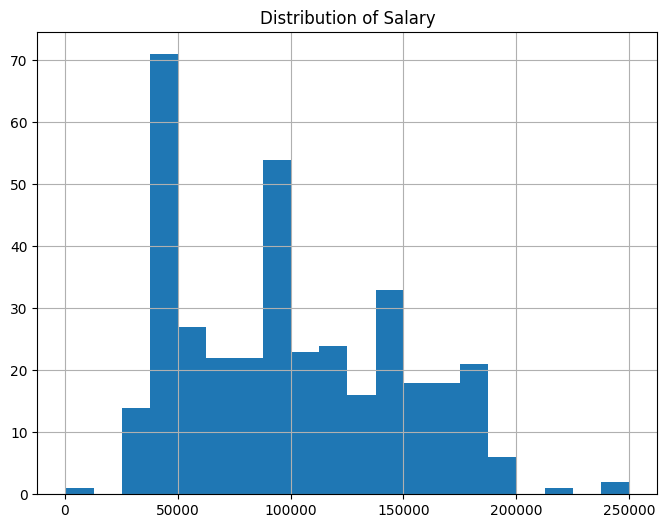

In [6]:
#distribution of salary amount 
fig = plt.figure(figsize=(8,6))
salary_df['Salary'].hist(bins=20)
plt.title('Distribution of Salary')
plt.show()

In [7]:
#check outlier records
##259
title = salary_df[salary_df['Salary']<=350.0]['Job_Title'].values[0]
salary_df[salary_df['Job_Title']==title]

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
218,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,35000.0
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0


In [8]:
#change salary for employee 259
salary_df.loc[259,'Salary'] = 35000.00

In [9]:
salary_df[salary_df['Job_Title']=='Junior Business Operations Analyst']

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
218,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,35000.0
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,35000.0


In [10]:
#check for missing values
salary_df.isna().sum()

Age                    2
Gender                 2
Education_Level        2
Job_Title              2
Years_of_Experience    2
Salary                 2
dtype: int64

In [11]:
#drop missing values 
salary_df.dropna(axis=0, inplace=True)
salary_df.isna().sum()

Age                    0
Gender                 0
Education_Level        0
Job_Title              0
Years_of_Experience    0
Salary                 0
dtype: int64

In [12]:
#check for validity/accuracy
salary_df['Education_Level'].value_counts()

Education_Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [13]:
#generate encoding for educational level using the label encoder due to it ordinal nature
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
salary_df['Education_Level'] = encoder.fit_transform(salary_df['Education_Level'])

In [14]:
#generate encoding for other char attributes using pandas get dummies

df = pd.get_dummies(salary_df, drop_first=True,dtype='float')
column_title = [col.replace(' ','_') for col in df.columns]
#df = df.reindex(columns= column_title)
df.columns= column_title
df.head()

,Age,Education_Level,Years_of_Experience,Salary,Gender_Male,Job_Title_Accountant,Job_Title_Administrative_Assistant,Job_Title_Business_Analyst,Job_Title_Business_Development_Manager,Job_Title_Business_Intelligence_Analyst,...,Job_Title_Supply_Chain_Manager,Job_Title_Technical_Recruiter,Job_Title_Technical_Support_Specialist,Job_Title_Technical_Writer,Job_Title_Training_Specialist,Job_Title_UX_Designer,Job_Title_UX_Researcher,Job_Title_VP_of_Finance,Job_Title_VP_of_Operations,Job_Title_Web_Developer
0,32.0,0,5.0,90000.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,1,3.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,2,15.0,150000.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0,7.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,1,20.0,200000.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Training a base model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [16]:
# separate target and predictor variables
X = df.drop('Salary', axis=1)
y = df['Salary']

In [17]:
#helper function to fit model to data and predict values
def fit_predict(X,y, model):
    """
        This function fits a specified model to data return metrics of model performance
        Args:
            X (dataframe): predictor variables
            y (array): target variable
            model: model to fit to data
        Example:
        fit_predict(X,y,lm)
        return:
            >>>>> mse: 0.00565
                  rmse: 0.00000345
                  r2: 0.87933888
    """
    #split variables into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =42)
    
    #apply scaling to predictor variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #train linear model
    model.fit(X_train_scaled,y_train)
    
    #predict salary values using the trained model
    y_pred = lm.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return f'mse: {mse}\nrmse: {rmse}\nr2: {r2}', (y_test,y_pred)

In [18]:
lm = LinearRegression()
metrics, pred = fit_predict(X,y, lm)
print(metrics)

mse: 1.4082370961438245e+34
rmse: 1.1866916600970214e+17
r2: -5.873571646850911e+24


#### Variable Selection

In [19]:
# from statsmodels.graphics.correlation import plot_corr

# fig = plt.figure(figsize=(15,15));
# ax = fig.add_subplot(111);
# plot_corr(df.corr(), xnames= df.corr().columns, ax=ax);

In [20]:
df_corr = df.corr()
corr = df_corr['Salary'].abs().sort_values(ascending=False)
highest_corr = corr.nlargest(10).index
corr_matrix = df_corr.loc[highest_corr,highest_corr]
corr_matrix

,Salary,Years_of_Experience,Age,Education_Level,Job_Title_Director_of_Marketing,Job_Title_Director_of_Operations,Job_Title_Junior_Business_Development_Associate,Job_Title_Senior_Data_Scientist,Job_Title_Chief_Technology_Officer,Job_Title_CEO
Salary,1.000000,0.930922,0.923102,0.671172,0.285407,0.261602,-0.172688,0.170885,0.161249,0.161249
Years_of_Experience,0.930922,1.000000,0.979128,0.590863,0.272930,0.282327,-0.168099,0.150203,0.110605,0.118523
Age,0.923102,0.979128,1.000000,0.562693,0.253569,0.263203,-0.165174,0.139867,0.106994,0.092306
Education_Level,0.671172,0.590863,0.562693,1.000000,0.117025,0.177680,-0.102620,0.280153,0.105030,-0.038473
Job_Title_Director_of_Marketing,0.285407,0.272930,0.253569,0.117025,1.000000,-0.031782,-0.025214,-0.025214,-0.009453,-0.009453
Job_Title_Director_of_Operations,0.261602,0.282327,0.263203,0.177680,-0.031782,1.000000,-0.024107,-0.024107,-0.009038,-0.009038
Job_Title_Junior_Business_Development_Associate,-0.172688,-0.168099,-0.165174,-0.102620,-0.025214,-0.024107,1.000000,-0.019126,-0.007170,-0.007170
Job_Title_Senior_Data_Scientist,0.170885,0.150203,0.139867,0.280153,-0.025214,-0.024107,-0.019126,1.000000,-0.007170,-0.007170
Job_Title_Chief_Technology_Officer,0.161249,0.110605,0.106994,0.105030,-0.009453,-0.009038,-0.007170,-0.007170,1.000000,-0.002688
Job_Title_CEO,0.161249,0.118523,0.092306,-0.038473,-0.009453,-0.009038,-0.007170,-0.007170,-0.002688,1.000000


<Axes: >

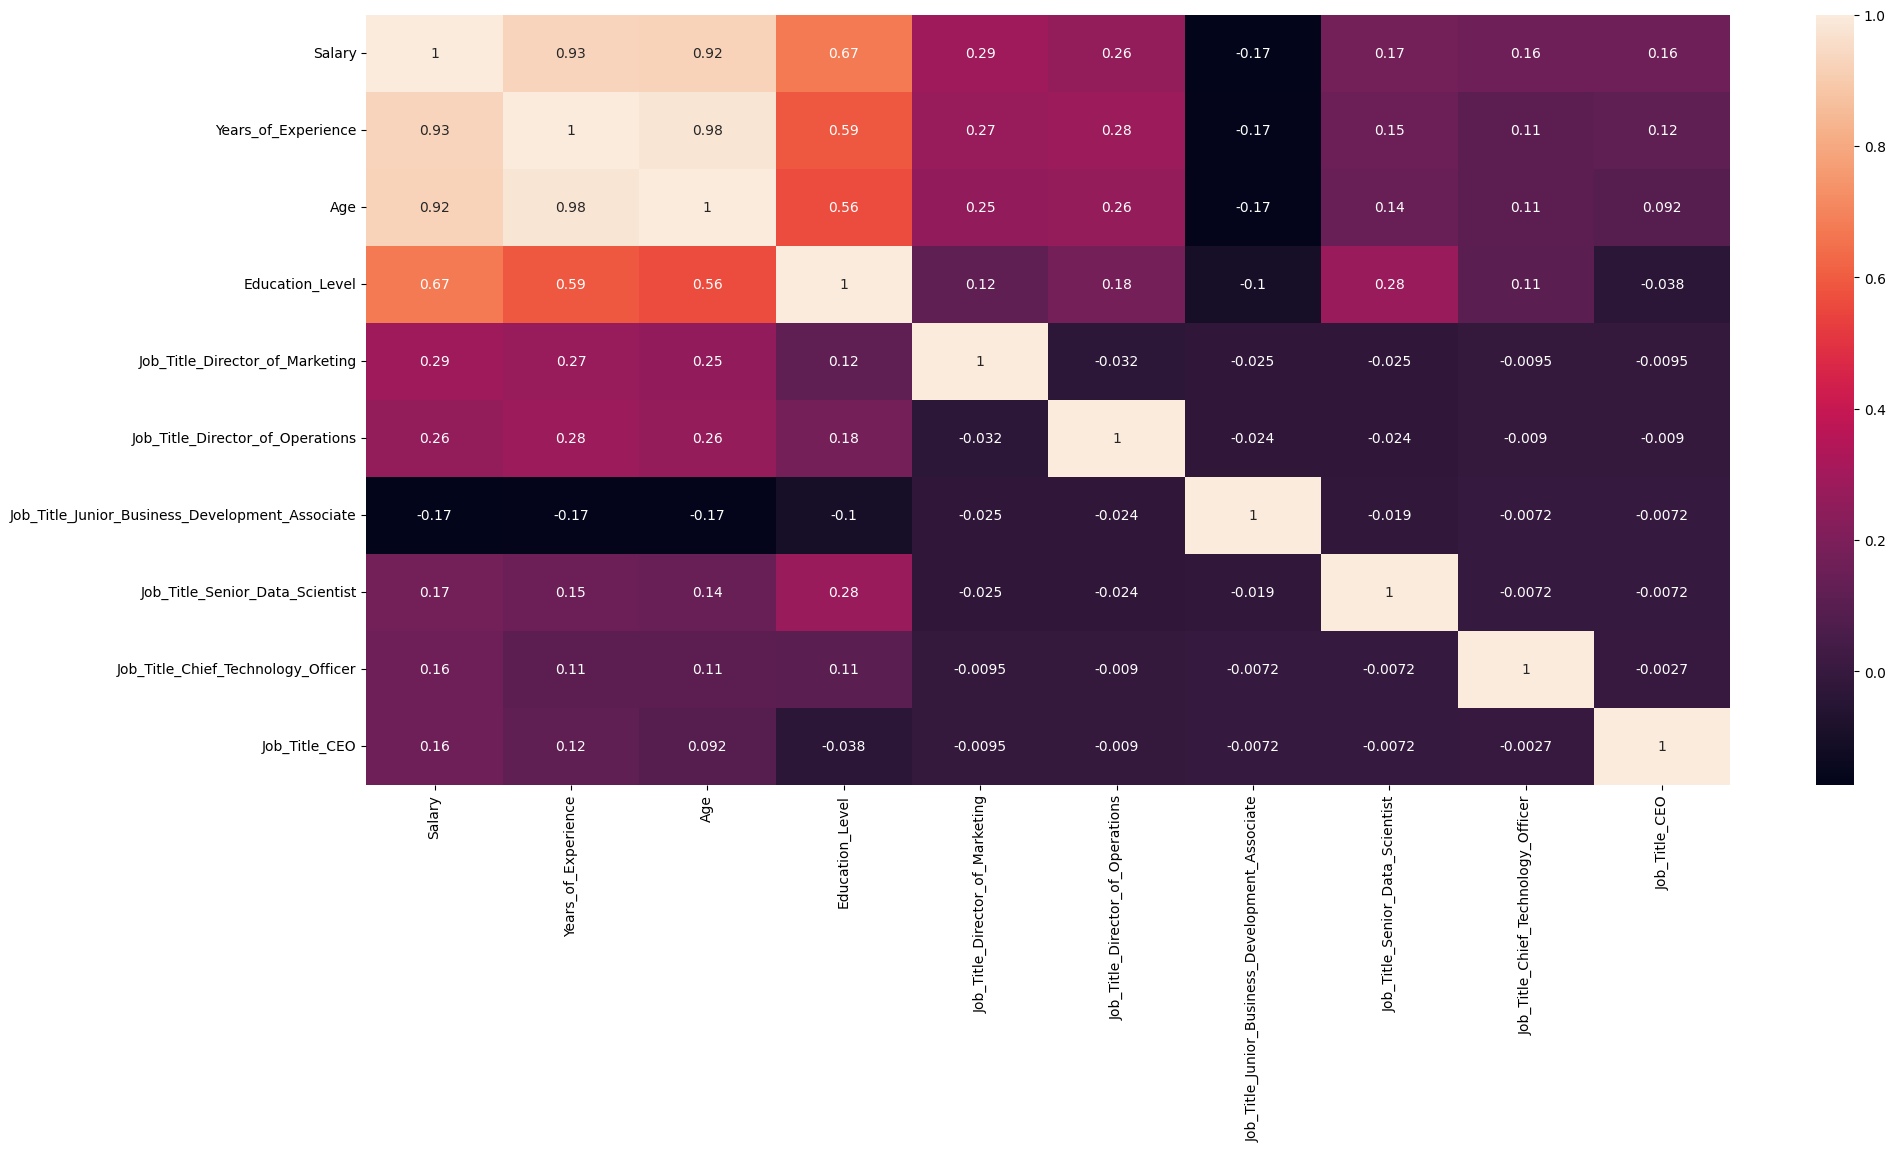

In [21]:
fig = plt.figure(figsize = (22,10))
ax = fig.add_subplot(111)
sns.heatmap(corr_matrix, annot=True, ax=ax)
#df_corr[corr.nlargest(10).index]

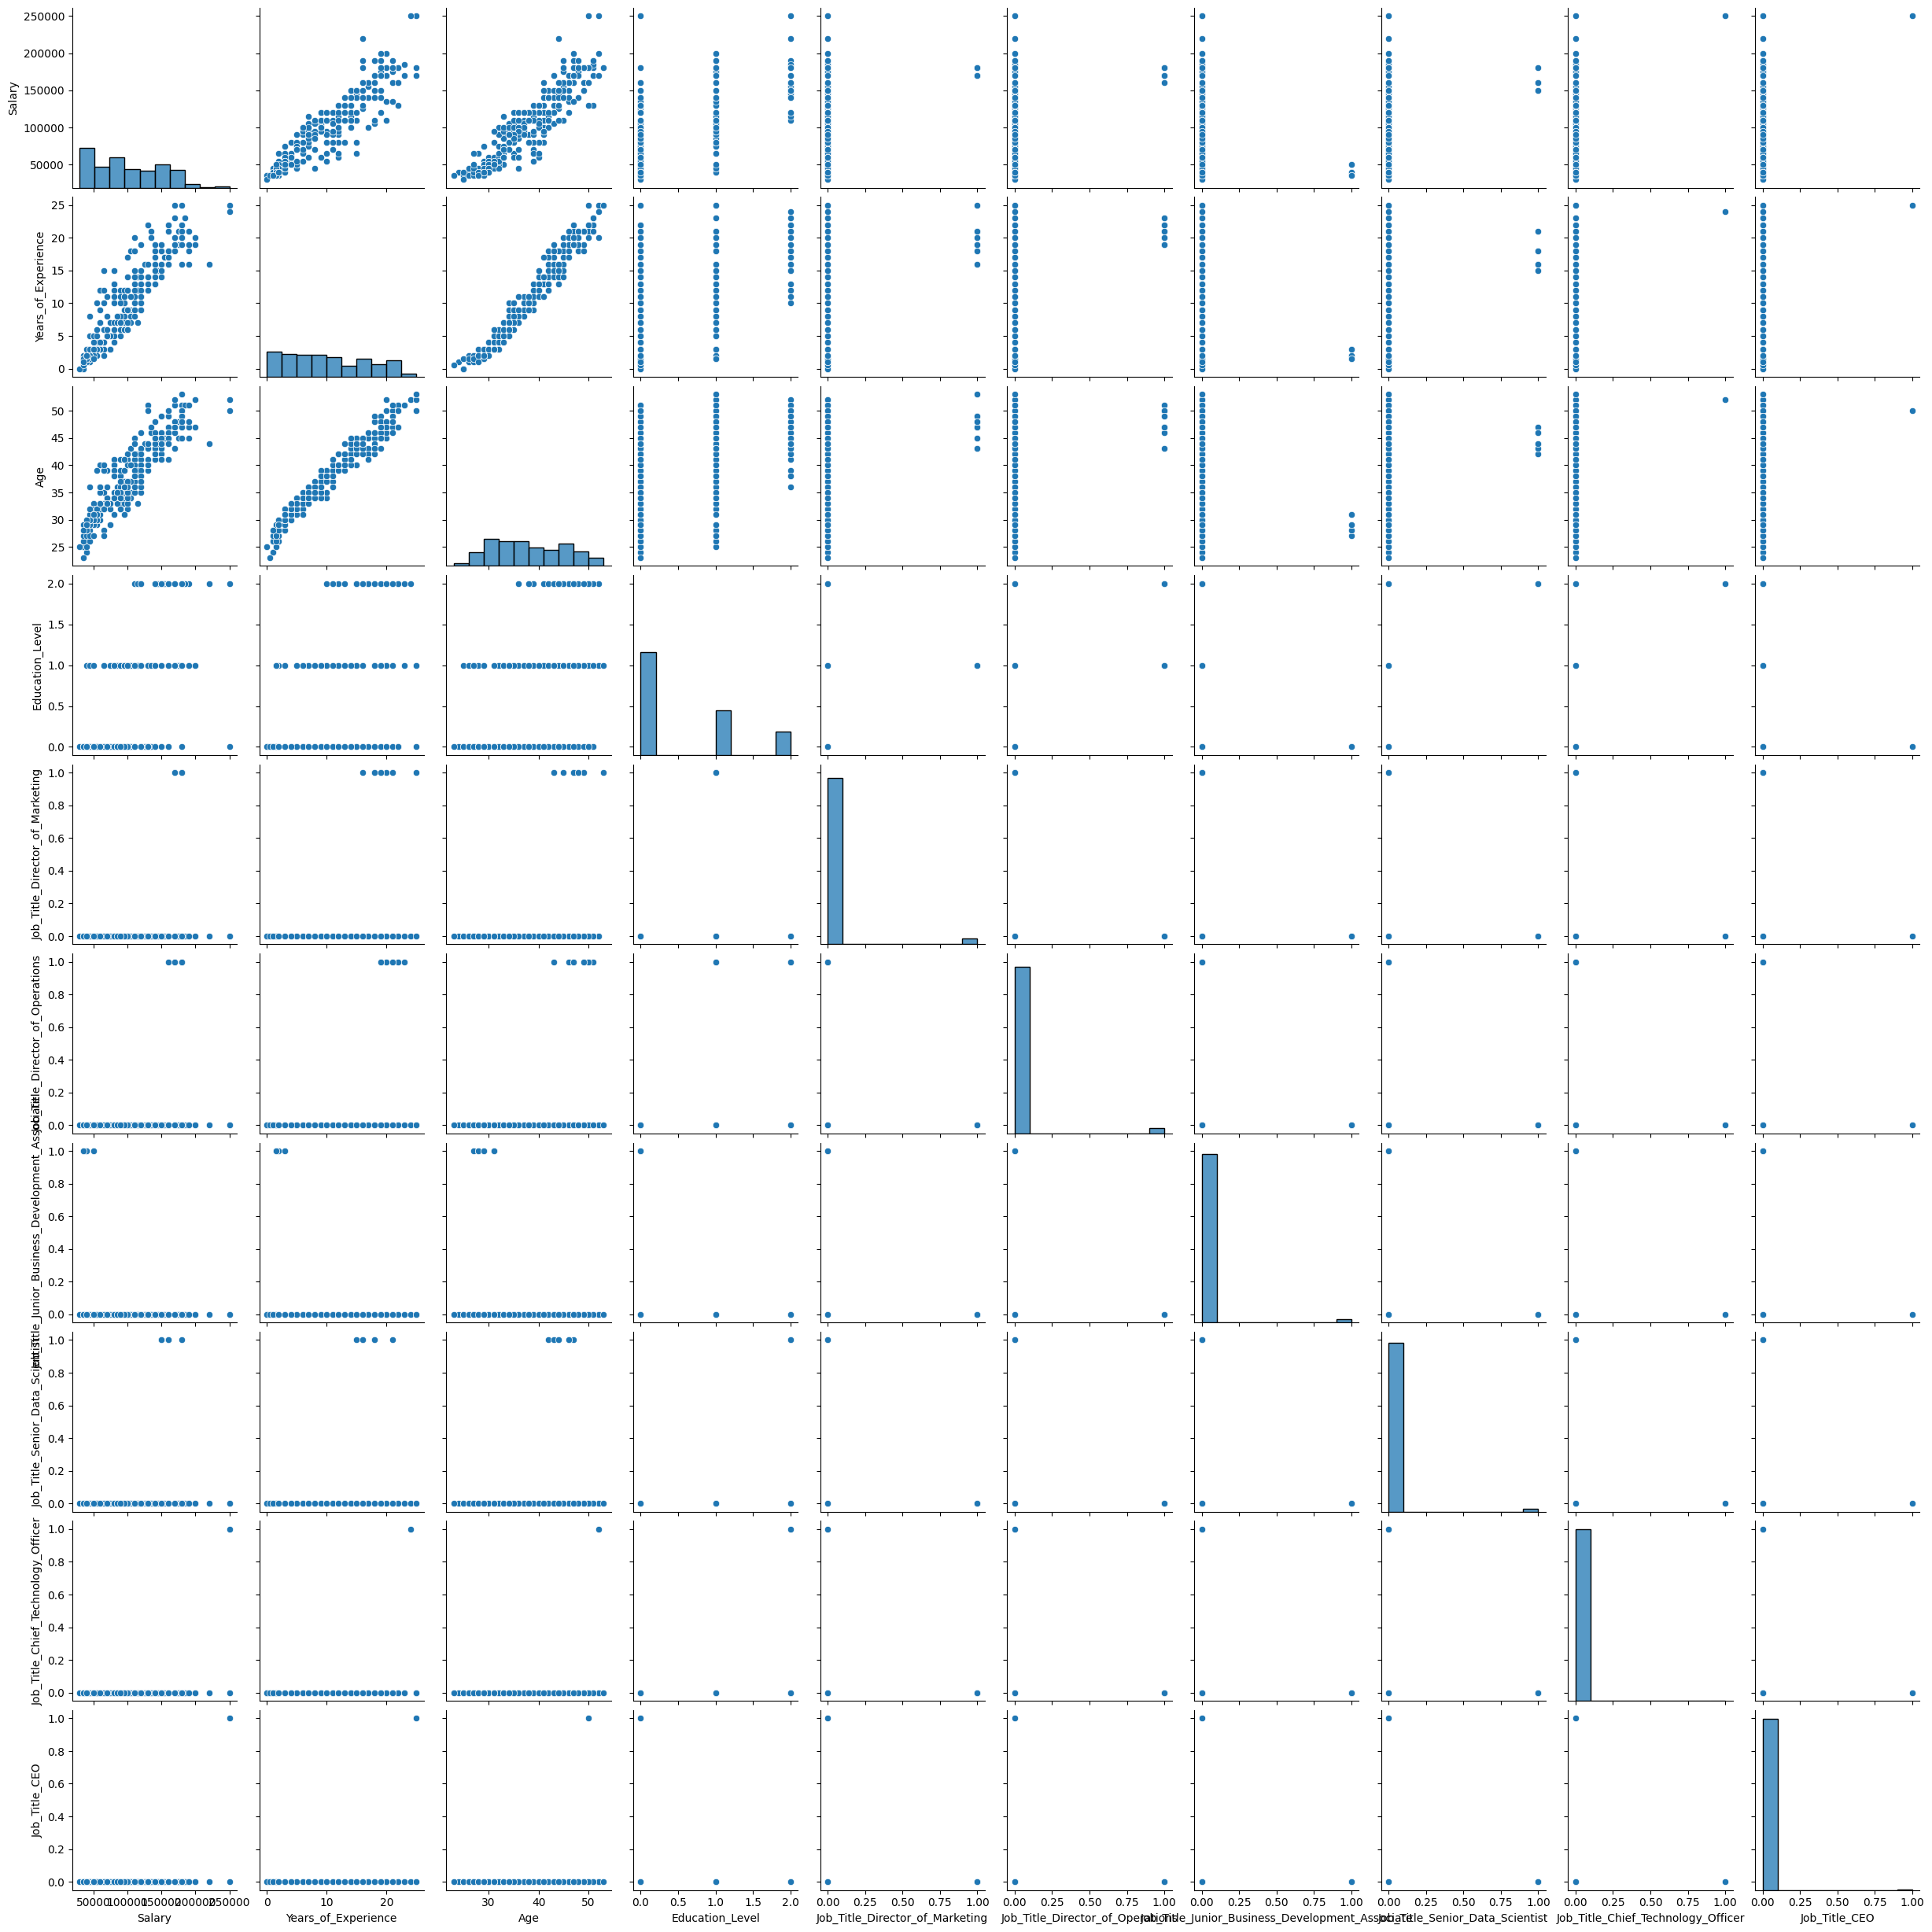

In [22]:
#visualize relationship using pair plot
df1 = df[highest_corr]
sns.pairplot(df1)

### Observation
from the the pearson correlation and pairplot we observe the following.
- Salary has strong positive correlation with experience and age.
- There is multicollinearity in the dataset as Age and experience are stongly correlated.
- Salary is moderately correlated with education level


In [23]:
corr

Salary                                          1.000000
Years_of_Experience                             0.930922
Age                                             0.923102
Education_Level                                 0.671172
Job_Title_Director_of_Marketing                 0.285407
                                                  ...   
Job_Title_Senior_Marketing_Specialist           0.004164
Job_Title_Senior_Financial_Manager              0.001627
Job_Title_Senior_Quality_Assurance_Analyst      0.000724
Job_Title_Senior_Product_Development_Manager    0.000724
Job_Title_Senior_Training_Specialist            0.000724
Name: Salary, Length: 178, dtype: float64

In [24]:
#get correlation and significants 
from scipy.stats import pearsonr

col_pval = {}
#get predictor column
cols= [col for col in df.columns if col != 'Salary']
for col in cols:
    corr_val, pval = pearsonr(df[col],df['Salary'])
    col_pval[col] = {'Co-efficient':corr_val, 'Pval':pval}
df_corr_pval = pd.DataFrame(col_pval).T.sort_values(by='Pval')
df_corr_pval.head()

,Co-efficient,Pval
Years_of_Experience,0.930922,2.266012e-164
Age,0.923102,4.688698e-156
Education_Level,0.671172,3.604611e-50
Job_Title_Director_of_Marketing,0.285407,2.014641e-08
Job_Title_Director_of_Operations,0.261602,2.976470e-07


In [25]:
#get attributes with p_val <0.05
df_pval = df_corr_pval[df_corr_pval['Pval']<0.05]
df_pval.index

Index(['Years_of_Experience', 'Age', 'Education_Level',
       'Job_Title_Director_of_Marketing', 'Job_Title_Director_of_Operations',
       'Job_Title_Junior_Business_Development_Associate',
       'Job_Title_Senior_Data_Scientist', 'Job_Title_CEO',
       'Job_Title_Chief_Technology_Officer',
       'Job_Title_Junior_Business_Analyst',
       'Job_Title_Junior_Marketing_Coordinator',
       'Job_Title_Junior_Financial_Analyst',
       'Job_Title_Director_of_Human_Resources',
       'Job_Title_Junior_Sales_Representative',
       'Job_Title_Junior_Project_Manager', 'Job_Title_Chief_Data_Officer',
       'Job_Title_Director_of_Engineering',
       'Job_Title_Junior_Operations_Analyst', 'Job_Title_Senior_Data_Engineer',
       'Job_Title_Junior_Marketing_Specialist',
       'Job_Title_Senior_Product_Designer', 'Job_Title_Director_of_Finance',
       'Job_Title_Junior_Accountant', 'Job_Title_Director',
       'Job_Title_VP_of_Finance', 'Job_Title_Senior_UX_Designer',
       'Job_Title_Se

In [26]:
#separate predictor and reponse variables
y=df['Salary']
X = df[df_pval.index]

In [27]:
#fit linear model to the train dataset
lm = LinearRegression()
metric, pred = fit_predict(X,y, lm)
print(metric)

mse: 3.892476016555515e+32
rmse: 1.9729358875937948e+16
r2: -1.6235005333613694e+23


In [28]:
#drop highly correlated predictors
X_corr = X.corr()
X_corr[X_corr.abs()>0.9]

,Years_of_Experience,Age,Education_Level,Job_Title_Director_of_Marketing,Job_Title_Director_of_Operations,Job_Title_Junior_Business_Development_Associate,Job_Title_Senior_Data_Scientist,Job_Title_CEO,Job_Title_Chief_Technology_Officer,Job_Title_Junior_Business_Analyst,...,Job_Title_Junior_Operations_Analyst,Job_Title_Senior_Data_Engineer,Job_Title_Junior_Marketing_Specialist,Job_Title_Senior_Product_Designer,Job_Title_Director_of_Finance,Job_Title_Junior_Accountant,Job_Title_Director,Job_Title_VP_of_Finance,Job_Title_Senior_UX_Designer,Job_Title_Senior_Data_Analyst
Years_of_Experience,1.000000,0.979128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.979128,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title_Director_of_Marketing,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title_Director_of_Operations,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title_Junior_Business_Development_Associate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title_Senior_Data_Scientist,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title_CEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title_Chief_Technology_Officer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title_Junior_Business_Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Get High off-diagonal Correlations
Instead of focusing on the entire matrix above. let filter for high off-diagonal correlation values

In [29]:
r, c = np.where(X_corr.abs()>0.9)
off_diagonal = np.where(r!=c)
X_corr.iloc[r[off_diagonal],c[off_diagonal]]

,Age,Years_of_Experience
Years_of_Experience,0.979128,1.000000
Age,1.000000,0.979128


We see that Age and Year_of_Experience have strong positive correlation. since years of experience is more significant to the target variable (Salary) we drop the Age attribute from our predictors

In [30]:
xname_corr = [col for col in df_pval.index if col !='Age']
y = df['Salary']
X = df[xname_corr]

In [31]:
lm  = LinearRegression()
metrics, pred = fit_predict(X,y,lm)
print(metrics)

mse: 3.883789435469641e+29
rmse: 623200564462969.8
r2: -1.619877474679435e+20


#### Feature Selection Using Variance thresholding.

Here we select predictor variables by including only variable that contribute significantly to the variance in the data. variable that does not change much through out the entire dataset is drop to reduce redundancy.

In [32]:
#scale/normalize the target variable as this affects variance
##split the dataset in target and response variables
X_data = df.drop('Salary', axis=1)
y_data = df['Salary']

In [33]:
#variale thresholding work best for scaled data as such we scale our data before applying variable thresholding
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
df_Xscaled = pd.DataFrame(X_scaled, columns=X_data.columns)
df_Xscaled.head()

,Age,Education_Level,Years_of_Experience,Gender_Male,Job_Title_Accountant,Job_Title_Administrative_Assistant,Job_Title_Business_Analyst,Job_Title_Business_Development_Manager,Job_Title_Business_Intelligence_Analyst,Job_Title_CEO,...,Job_Title_Supply_Chain_Manager,Job_Title_Technical_Recruiter,Job_Title_Technical_Support_Specialist,Job_Title_Technical_Writer,Job_Title_Training_Specialist,Job_Title_UX_Designer,Job_Title_UX_Researcher,Job_Title_VP_of_Finance,Job_Title_VP_of_Operations,Job_Title_Web_Developer
0,0.300000,0.0,0.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,0.5,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.733333,1.0,0.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.433333,0.0,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.966667,0.5,0.80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.feature_selection import VarianceThreshold

#create an instance of the selector object and initial with a threashold
selector = VarianceThreshold(threshold = 0.03)
selector.fit(X_scaled)

VarianceThreshold(threshold=0.03)

In [35]:
#overview of variance for each feature to allow for refining of the threshold
feature_variance = {'Feature_name':df_Xscaled.columns, 'Variance':selector.variances_}
feature_variance_df = pd.DataFrame(feature_variance)
feature_variance_df.sort_values('Variance', ascending=False)

,Feature_name,Variance
3,Gender_Male,0.249596
1,Education_Level,0.130537
2,Years_of_Experience,0.068607
0,Age,0.055375
32,Job_Title_Director_of_Marketing,0.031137
...,...,...
55,Job_Title_Junior_Copywriter,0.002674
56,Job_Title_Junior_Customer_Support_Specialist,0.002674
58,Job_Title_Junior_Data_Scientist,0.002674
59,Job_Title_Junior_Designer,0.002674


In [36]:
Xnames_var =df_Xscaled.columns[selector.get_support(indices=True)]
Xnames_var

Index(['Age', 'Education_Level', 'Years_of_Experience', 'Gender_Male',
       'Job_Title_Director_of_Marketing'],
      dtype='object')

In [37]:
#select variables using different thresholds
thresholds = [0.01, 0.03, 0.06]
selections= {}
for val in thresholds:
    selector = VarianceThreshold(threshold= val)
    selector.fit(X_scaled)
    var_names =list(df_Xscaled.columns[selector.get_support(indices=True)])
    selections[val] = var_names
selections

{0.01: ['Age',
  'Education_Level',
  'Years_of_Experience',
  'Gender_Male',
  'Job_Title_Director_of_Marketing',
  'Job_Title_Director_of_Operations',
  'Job_Title_Junior_Business_Analyst',
  'Job_Title_Junior_Business_Development_Associate',
  'Job_Title_Junior_Financial_Analyst',
  'Job_Title_Junior_Marketing_Coordinator',
  'Job_Title_Junior_Marketing_Specialist',
  'Job_Title_Junior_Operations_Analyst',
  'Job_Title_Junior_Product_Manager',
  'Job_Title_Junior_Project_Manager',
  'Job_Title_Junior_Sales_Representative',
  'Job_Title_Senior_Business_Analyst',
  'Job_Title_Senior_Business_Development_Manager',
  'Job_Title_Senior_Data_Engineer',
  'Job_Title_Senior_Data_Scientist',
  'Job_Title_Senior_Financial_Analyst',
  'Job_Title_Senior_Financial_Manager',
  'Job_Title_Senior_Marketing_Analyst',
  'Job_Title_Senior_Marketing_Manager',
  'Job_Title_Senior_Marketing_Specialist',
  'Job_Title_Senior_Operations_Coordinator',
  'Job_Title_Senior_Operations_Manager',
  'Job_Title_Sen

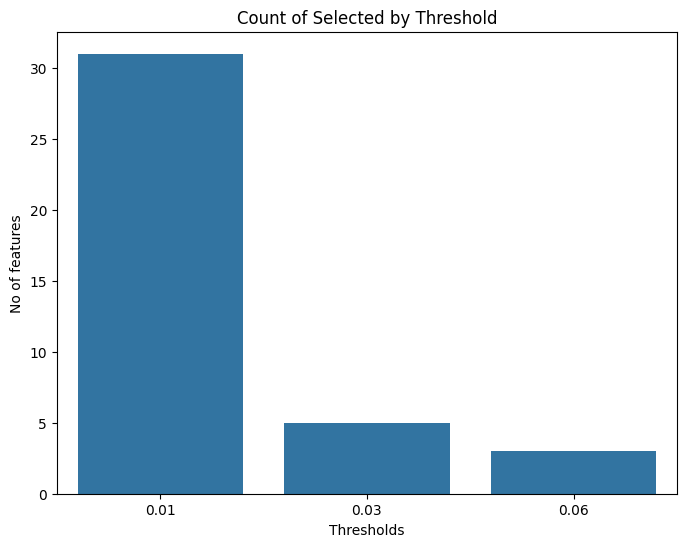

In [38]:
#plot count of selected variables each threshold
thresholds = selections.keys()
height=[len(selections[key]) for key in selections]
fig = plt.figure(figsize=(8,6))
sns.barplot(x=thresholds, y=height)
plt.title('Count of Selected by Threshold')
plt.xlabel('Thresholds')
plt.ylabel('No of features')
plt.show()

In [39]:
#fit the model to the selected variables to determine the best threshold

In [40]:
for thres in selections:
    X = df[selections[thres]]
    y = df['Salary']
    lm  = LinearRegression()
    metrics, pred = fit_predict(X,y,lm)
    print(f'{thres}: {metrics}')
    

0.01: mse: 266085377.85460114
rmse: 16312.123646374224
r2: 0.8890192897710189
0.03: mse: 242488990.88886175
rmse: 15572.05801712997
r2: 0.8988610323177536
0.06: mse: 207721136.58497232
rmse: 14412.534009846164
r2: 0.9133622469087028


#### Observation
The model seems to perform better on the set of predictors selected using a variance threshold of 0.06.
let us train the model on different sets of predictors (all, correlation & significant, variable thresholding) 

In [41]:
selector = VarianceThreshold(threshold = 0.06)
selector.fit_transform(X_scaled)
Xname_var = list(df_Xscaled.columns[selector.get_support(indices=True)])

Xname = [col for col in df.columns if col !='Salary']
vars = [Xname, xname_corr, Xname_var]
selections = ['base','correlation', 'varianceThreshold']
model_metrics = {}
for var,selection in zip(vars, selections):
    lm = LinearRegression()
    X = df[var]
    y= df['Salary']
    metrics, pred = fit_predict(X,y,lm)
    model_metrics[selection] = {'metrics':metrics, 'Prediction':pred}

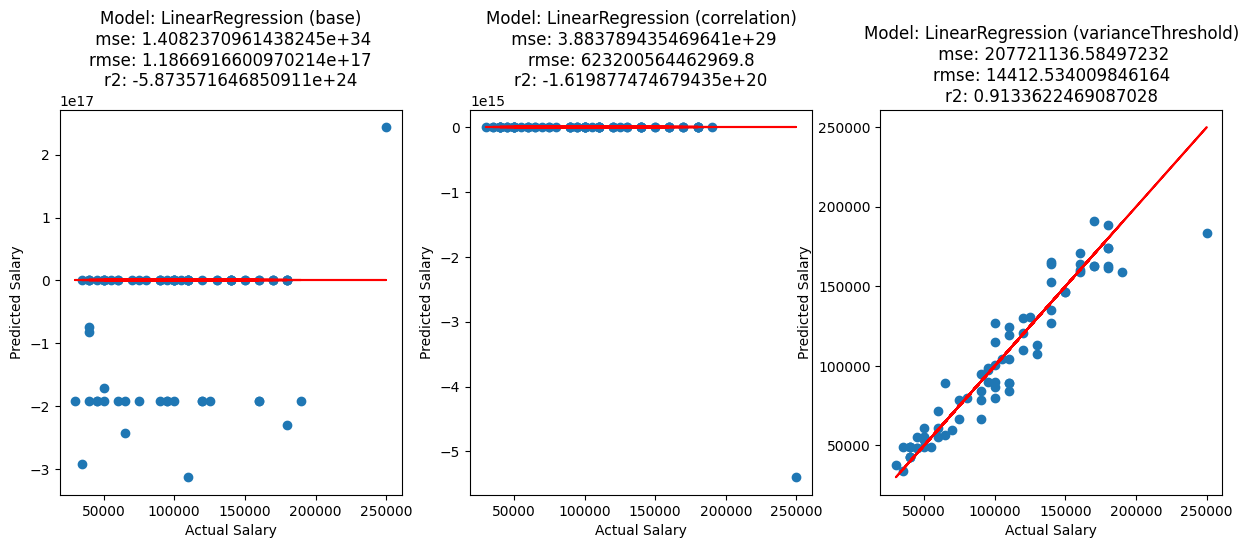

In [48]:
#plot of target vs predicted values

fig,ax = plt.subplots(1,3, figsize=(15,5))
for idx, model in enumerate(model_metrics):
    y_test = model_metrics[model]['Prediction'][0]
    y_pred = model_metrics[model]['Prediction'][1]
    metrics = model_metrics[model]['metrics']
    ax[idx].plot(y_test, y_test, 'r')
    ax[idx].scatter(y_test,y_pred)
    ax[idx].set_title(f'Model: LinearRegression ({model})\n {metrics}')
    ax[idx].set_xlabel('Actual Salary')
    ax[idx].set_ylabel('Predicted Salary')

#### Conclusion
- The multilinear regression model performed poorly for all variations of training features (No threshold-base, Correlation, and variance thresholding) given the large values of MSE and RSME. this might be indicative of the non-linear relation between some of the features and the target variables. we might need to consider other sophisticated model like the random forest and other essemble and boasting models.
- With feature selection using variable thresholding the model was able to model strong positive linear correlation between the selected predictors (eduction, experience, and gender) and the target variable with an r2_score of 0.91